In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import warnings
warnings.filterwarnings("ignore")

In [77]:
data_raw = pd.read_csv('Churn_Modelling.csv')
data_raw.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [79]:
data_raw.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [80]:
X = data_raw.iloc[:,3:-1].values
y = data_raw.iloc[:,-1].values

In [81]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [83]:
print(X[:,2])

['Female' 'Female' 'Female' ... 'Female' 'Male' 'Female']


In [67]:
print(y)

[1 0 1 ... 1 1 0]


<Axes: xlabel='Exited'>

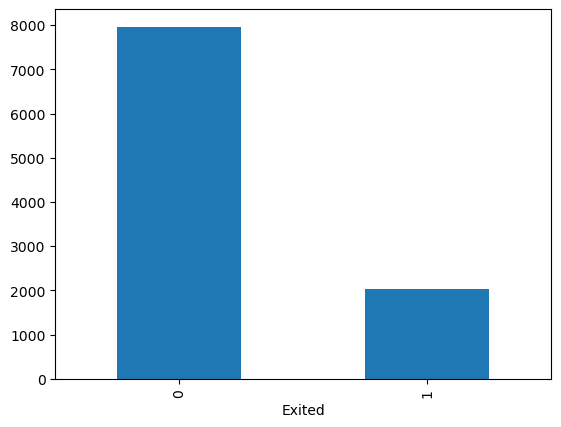

In [84]:
data_raw['Exited'].value_counts().plot.bar()

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [86]:
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [87]:
print(X[:,2])

[0 0 0 ... 0 1 0]


In [88]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X)) 

In [91]:
print(X[:,1])

[0.0 0.0 0.0 ... 0.0 1.0 0.0]


In [92]:
from sklearn.model_selection import train_test_split

In [118]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, stratify=y_trainval,
                                                 random_state=42) 
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 12) (2000, 12) (2000, 12)


In [94]:
from sklearn.preprocessing import StandardScaler

In [122]:
sc = StandardScaler()

In [135]:
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [136]:
from keras import models,layers

In [137]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
              
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [138]:
'''
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_val = X_val.astype('float32')
y_val = y_val.astype('float32')
'''

model = build_model()
print('training...')
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, batch_size=32, verbose=0)
print('traninig done')

training...
traninig done


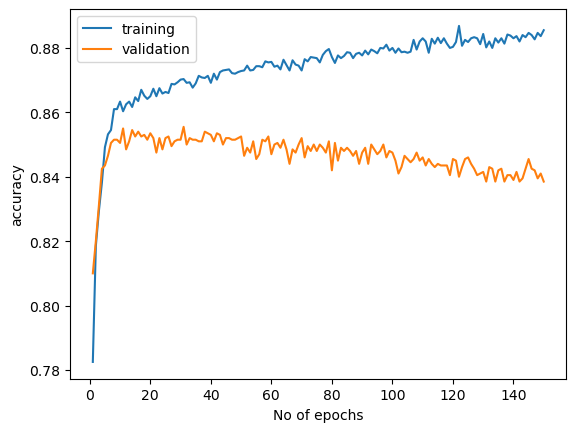

In [139]:
acc_history = history.history['accuracy']
val_acc_history = history.history['val_accuracy']
plt.plot(range(1,len(acc_history)+1), acc_history)
plt.plot(range(1, len(val_acc_history)+1), val_acc_history)
plt.xlabel('No of epochs')
plt.ylabel('accuracy')
plt.legend(['training','validation'])

In [140]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for i in points:
        if smoothed_points:
            previous=smoothed_points[-1]
            smoothed_points.append(previous * factor + i * (1-factor))
        else:
            smoothed_points.append(i)
    return smoothed_points

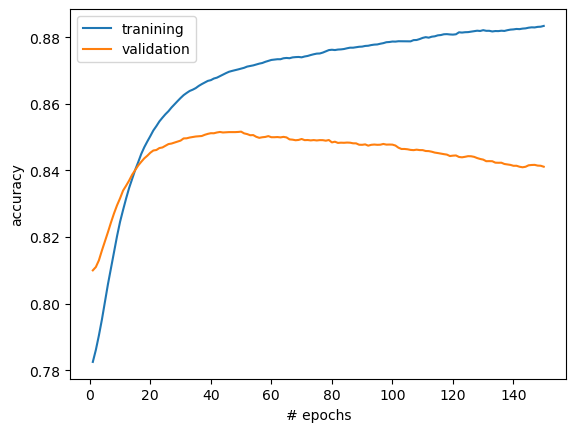

In [141]:
acc_history_smoothed = smooth_curve(acc_history)
val_acc_history_smoothed = smooth_curve(val_acc_history)

plt.plot(range(1, len(acc_history_smoothed)+1), acc_history_smoothed)
plt.plot(range(1, len(val_acc_history_smoothed)+1), val_acc_history_smoothed)
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend(['tranining','validation'])

In [143]:
X_trainval = sc.transform(X_trainval)
print(X_trainval.shape)

(8000, 12)


In [146]:
model = build_model()
model.fit(X_trainval, y_trainval, epochs=40, batch_size = 32, verbose=0)
test_loss_score, test_accuracy_score = model.evaluate(X_test, y_test)
print('Test accuracy score:', test_accuracy_score)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.6718 - loss: 0.5971
Test accuracy score: 0.656499981880188


In [151]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step
[[0 0]
 [1 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [155]:
from sklearn.metrics import confusion_matrix, accuracy_score;
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print('TN: ',tn, 'FP: ',fp,'\nFN: ',fn,'TP: ',tp)

TN:  1065 FP:  528 
FN:  159 TP:  248


In [150]:
accuracy_score(y_test, y_pred)

0.6565

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography:  France [1 0 0]

Credit Score: 600

Gender: Male [1]

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card ? Yes [1]

Is this customer an Active Member: Yes [1]

Estimated Salary: $ 50000

So, should we say goodbye to that customer ?

In [156]:
print(model.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[False]]
